# Backbone Summary

In [6]:
import networkx as nx
import pickle as pk
import configparser


import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
import numpy as np


config = configparser.ConfigParser()
config.read('networks.ini')
networks = list(config.keys())[1:]

In [4]:
Type = {'business-faculty': 'Social',
 'cs-faculty': 'Social',
 'history-faculty': 'Social',
 'caviar-proj': 'Social',
 'celegans-her': 'Biomedical',
 'celegans-male': 'Biomedical',
 'colombia-calls': 'Social',
 'colombia-mobility': 'Technological',
 'mobility-manizales': 'Technological',
 'mobility-medellin': 'Technological',
 'tennis-loss': 'Social',
 'yeast-grn': 'Biomedical',
 'bike-sharing': 'Technological',
 'giraffe': 'Social',
 'comorbidity': 'Biomedical',
 'phone-calls': 'Social',
 'us-airports': 'Technological',
 'DDI': 'Biomedical',
 'us-weblinks': 'Technological',
 'host-pathogen': 'Biomedical'}

## Backbone Sizes

In [15]:
df_wcc = pd.DataFrame(columns=['type', 'n_nodes', 'n_edges', 'density', 'tau_metric', 'tau_ultrametric', 'ultra_per_metric'], index=networks)
df_scc = pd.DataFrame(columns=['type', 'n_nodes', 'n_edges', 'density', 'tau_metric', 'tau_ultrametric', 'ultra_per_metric'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    rGstats = f'networks/{folder}/network-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    df_wcc['type'][network] = Type[network]   
    for col in data.T.columns:
        df_wcc[col][network] = data[network][col]    
    #break
    
    rGstats = f'networks/{folder}/network_lscc-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    df_scc['type'][network] = Type[network]   
    for col in data.T.columns:
        df_scc[col][network] = data[network][col]    
    
#display(df)
df_wcc.to_csv('Summary/BackboneStats.csv')
df_scc.to_csv('Summary/BackboneStats_LSCC.csv')

### Comparison with Undirected

Here we consider only (for now) the metric and ultrametric case

In [16]:
df_compare = pd.DataFrame(columns=['n_nodes', 'nu_edges', 'nd_edges', 'metric', 'ultrametric', 'metric_avg', 
                                   'ultrametric_avg', 'metric_max', 'ultrametric_max'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    data = pd.read_csv(f'networks/{folder}/undirected-stats.csv', index_col=0)
    
    df_compare['n_nodes'][network] = data['n_nodes']['mlscc']
    df_compare['nu_edges'][network] = data['n_edges']['max']
    df_compare['nd_edges'][network] = data['n_edges']['mlscc']
    
    for btype in ['metric', 'ultrametric']:
        df_compare[btype][network] = data[f'tau_{btype}']['mlscc']
        df_compare[f'{btype}_avg'][network] = data[f'tau_{btype}']['avg']
        df_compare[f'{btype}_max'][network] = data[f'tau_{btype}']['max']
            
    
    #break

#display(df_compare)
#df_wcc.to_csv('Summary/BackboneCompareStats_WCC.csv')
df_compare.drop(index='host-pathogen',axis=0,inplace=True) # Remove SSI which does not have an undirect representation
df_compare.to_csv('Summary/BackboneCompareStats.csv')

## Plotting

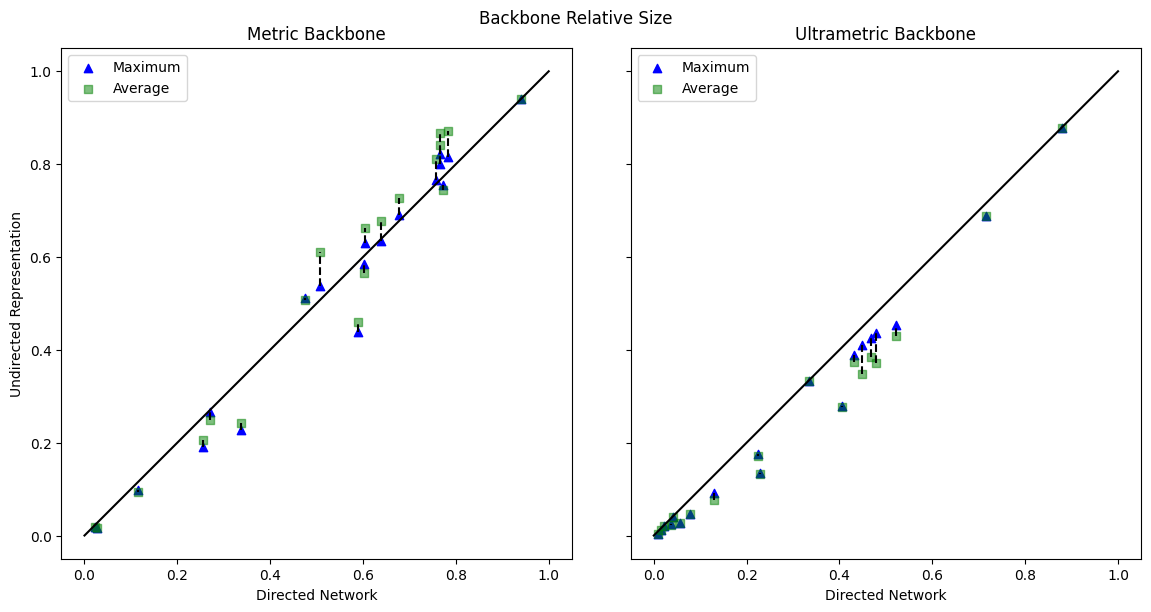

In [5]:
df = pd.read_csv('Summary/BackboneCompareStats.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Same commands for both axis
for i, btype in enumerate(['metric', 'ultrametric']):
    ax[i].scatter(df[btype], df[f'{btype}_max'], marker='^', c='b', label='Maximum')
    ax[i].scatter(df[btype], df[f'{btype}_avg'], marker='s', c='g', label='Average', alpha=0.5)

    ax[i].vlines(df[btype], ymin=df[[f'{btype}_max', f'{btype}_avg']].min(axis=1), ymax=df[[f'{btype}_max', f'{btype}_avg']].max(axis=1), linestyle='--', color='k')
    ax[i].plot([0, 1], [0, 1], 'k-')
    
    ax[i].legend()
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network')
    ax[i].set_title(btype.capitalize() + ' Backbone')
    
# Labels
ax[0].set_ylabel('Undirected Representation')
fig.suptitle('Backbone Relative Size')

plt.tight_layout()
plt.show()

In [6]:
display(df)

,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max
business-faculty,84,488,976,0.604508,0.224385,0.661885,0.172131,0.629098,0.176230
cs-faculty,78,179,358,0.782123,0.522346,0.871508,0.430168,0.815642,0.452514
history-faculty,56,158,316,0.756329,0.449367,0.810127,0.348101,0.765823,0.411392
caviar-proj,63,90,180,0.772222,0.716667,0.744444,0.688889,0.755556,0.688889
celegans-her,215,558,1116,0.765233,0.466846,0.840502,0.383513,0.820789,0.424731
celegans-male,238,634,1268,0.677445,0.431388,0.727129,0.373817,0.690852,0.389590
colombia-calls,863,199898,399796,0.027959,0.009622,0.015118,0.004312,0.015703,0.004317
colombia-mobility,863,67150,134300,0.022115,0.015748,0.018094,0.012837,0.018183,0.012837
mobility-manizales,57,1237,2474,0.271221,0.078011,0.249798,0.045271,0.265158,0.045271
mobility-medellin,413,15503,31006,0.256273,0.057311,0.205380,0.026640,0.189770,0.027156


In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

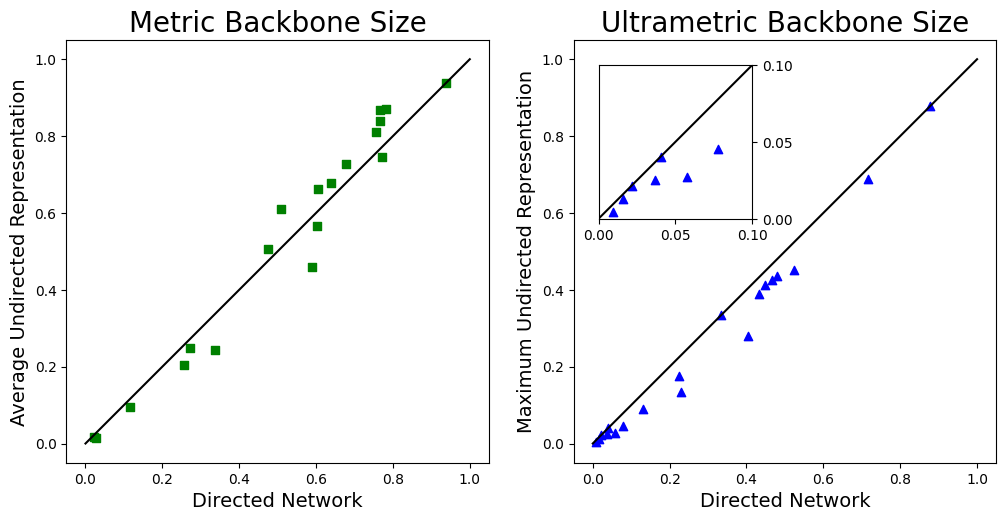

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Same commands for both axis

ax[0].scatter(df['metric'], df[f'metric_avg'], marker='s', c='g', label='Average')
ax[1].scatter(df['ultrametric'], df[f'ultrametric_max'], marker='^', c='b', label='Maximum')

for i in range(2):
    ax[i].plot([0, 1], [0, 1], 'k-')
    #ax[i].legend(fontsize=12, loc=4)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network', fontsize=14)

ax[0].set_title('Metric Backbone Size', fontsize=20)    
ax[0].set_ylabel('Average Undirected Representation', fontsize=14)

ax[1].set_title('Ultrametric Backbone Size', fontsize=20)    
ax[1].set_ylabel('Maximum Undirected Representation', fontsize=14)

# Add Ultrametric inset
axes = zoomed_inset_axes(ax[1], 4.0, loc=2, borderpad=1.8)
axes.scatter(df['ultrametric'], df['ultrametric_max'], marker='^', c='b', label='Maximum')
axes.plot([0, 0.1], [0, 0.1], 'k-')

axes.yaxis.tick_right()
axes.set_xlim((0, 0.1))
axes.set_ylim((0, 0.1))
axes.set_aspect('equal')
axes.set_yticks([0.0, 0.05, 0.10])

#plt.tight_layout()
plt.draw()
plt.show()

## Non-Reciprocal Paths

### Some clear difference in the distribution?
Not really

Undirected


/tmp/ipykernel_6416/3112305841.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[network] = np.log10(np.array(list(weights.values())))
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


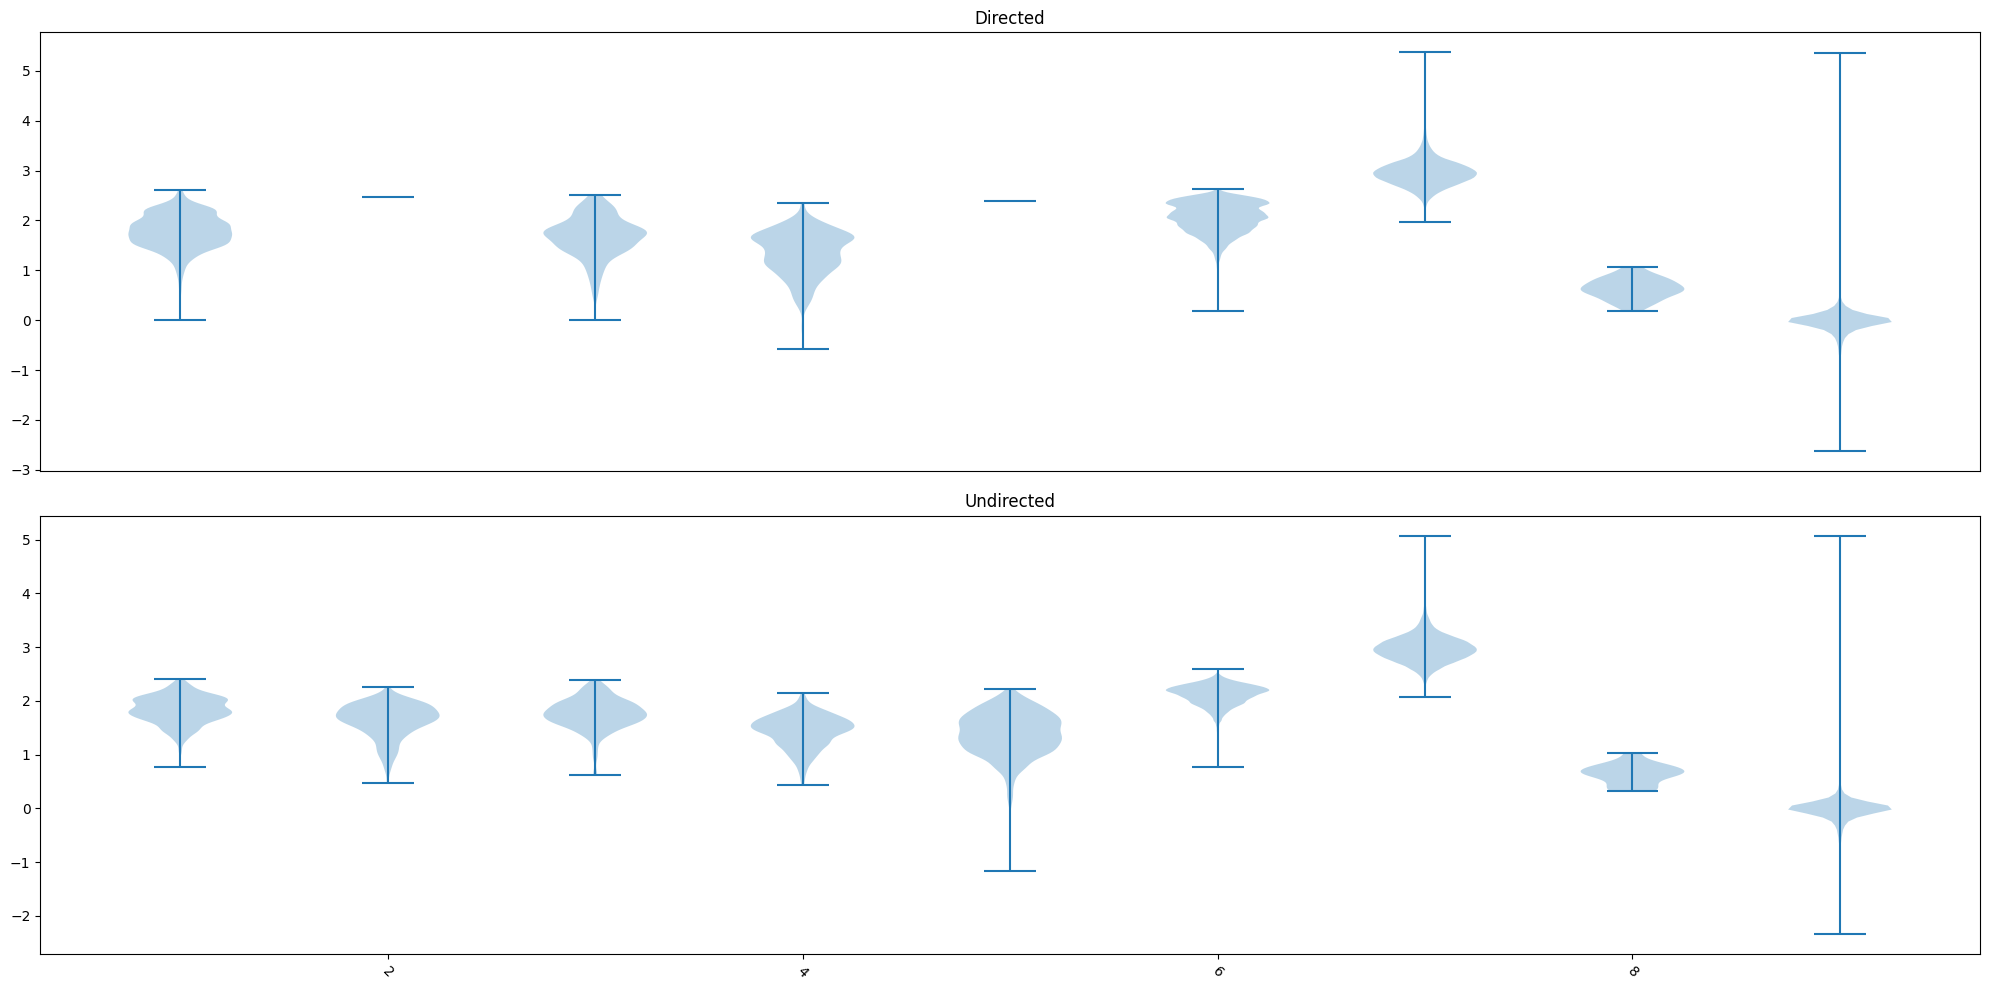

Directed


/tmp/ipykernel_6416/3112305841.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[network] = np.log10(np.array(list(weights.values())))
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


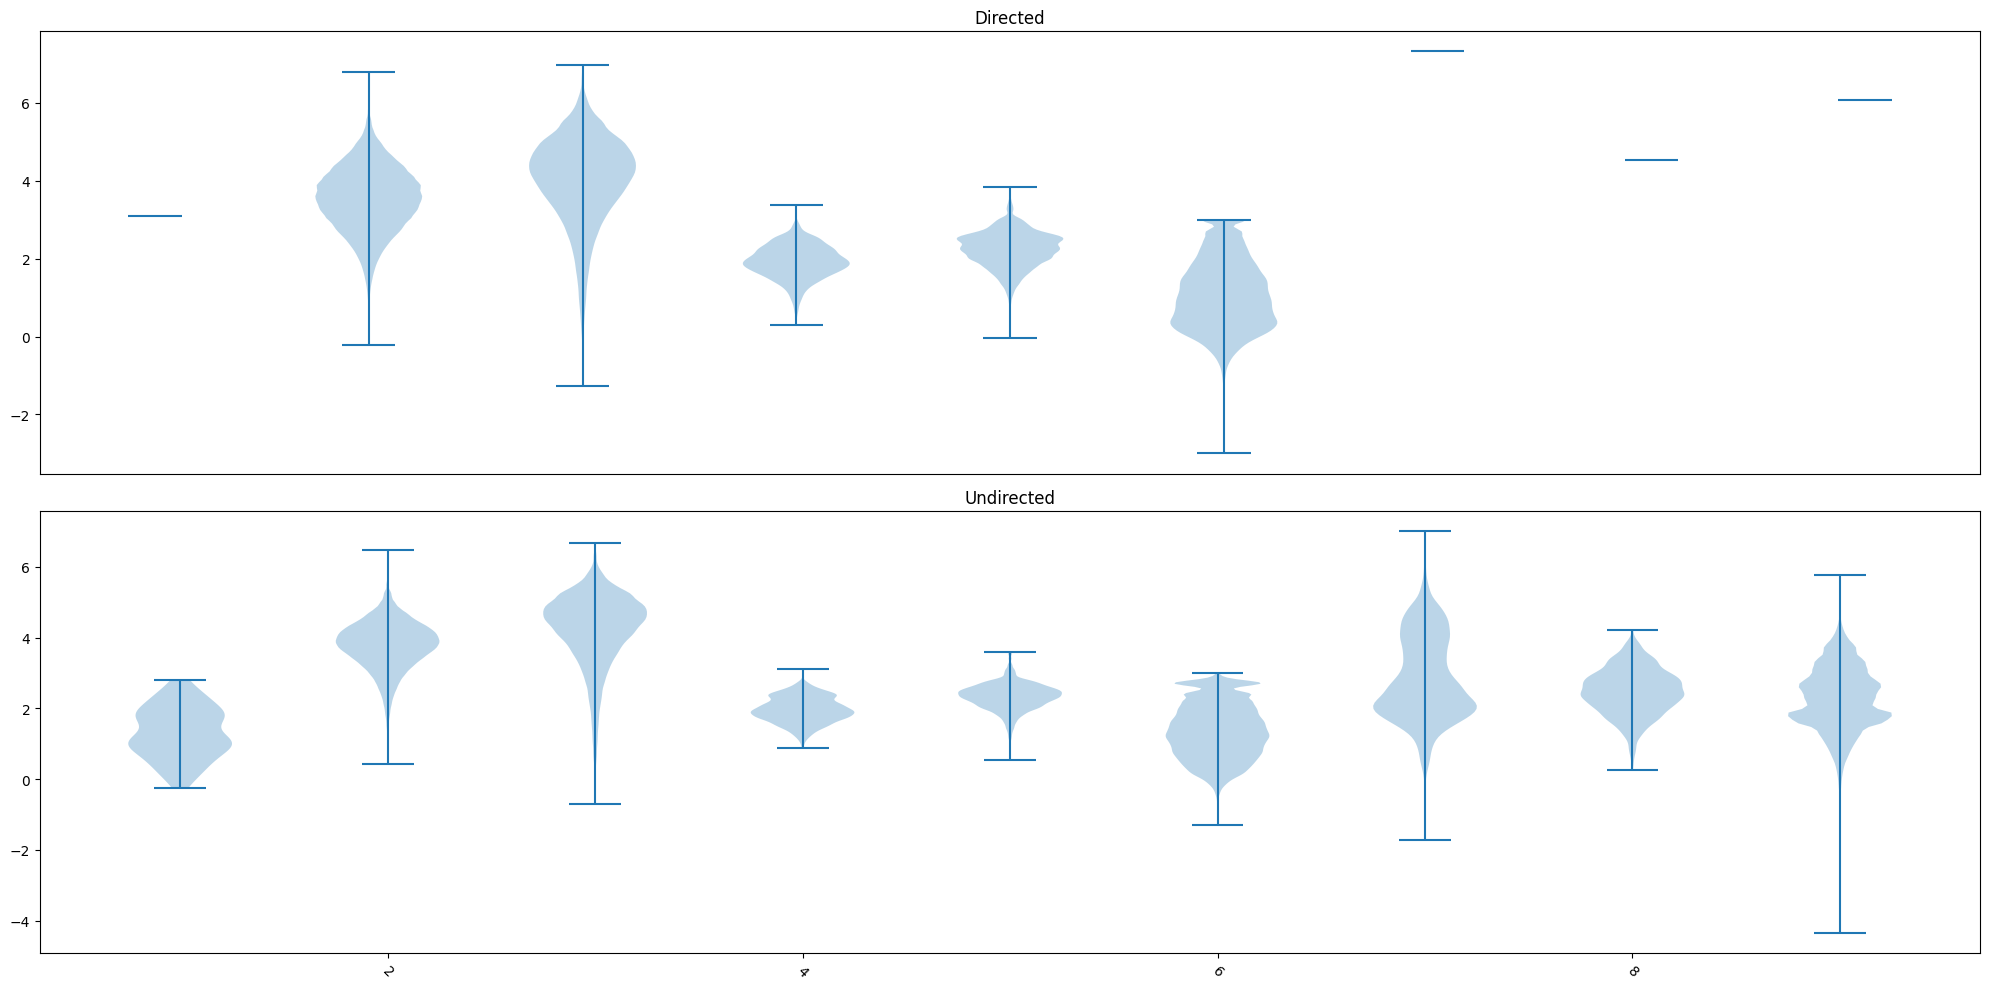

In [77]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)

    und_dist = dict.fromkeys(df.index)
    dist = dict.fromkeys(df.index)

    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='avg_distance')
        und_dist[network] = np.log10(np.repeat(list(weights.values()), 2))

        D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='distance')
        dist[network] = np.log10(np.array(list(weights.values())))
        #print(und_dist)
        
        #plt.boxplot([np.log10(dist), np.log10(und_dist)], labels=['Directed', 'Undirected'])
        #plt.title(network)
        
        
    fig, ax = plt.subplots(2, 1, figsize=(20, 10))

    ax[0].violinplot(dist.values())
    ax[0].set_title('Directed')
    ax[0].set_xticks([])

    ax[1].violinplot(und_dist.values())#, labels=und_dist.keys())
    ax[1].set_title('Undirected')
    plt.xticks(rotation=315)
    
    plt.tight_layout()
    plt.show()

    #break

### KL Divergence?

Most of the directed have infinity KL divergence. 
This is found because there are regions of zero probability in the directed weights distribution, which are finite in the undirected weights.

In [29]:
from scipy.stats import entropy

In [51]:
def kl_div(p, q):
    
    if len(p) != len(q):
        raise ArithmeticError
    
    h = 0
    for i in range(len(p)):
        if p[i] > 0.0:
            h += p[i]*np.log(p[i]/q[i])
            #print(h, q[i])
    
    return h

In [75]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)

    #und_dist = dict.fromkeys(df.index)
    #dist = dict.fromkeys(df.index)

    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='distance')
        dist = np.array(list(weights.values()))

        Q, bins = np.histogram(np.log10(dist), range=(dist.min(), dist.max()), bins='doane', density=True)

        D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='avg_distance')
        und_dist = np.repeat(list(weights.values()), 2)

        P, _ = np.histogram(np.log10(und_dist), range=(dist.min(), dist.max()), bins=bins, density=True)

        #print(Q, P)
        print(network, kl_div(P, Q))
        #break
    #break

Undirected
business-faculty 1.0196907910730035
cs-faculty 0.5309229745511237
history-faculty 1.044855628703406
celegans-her 0.8737080928362628
celegans-male 0.36658335052997004


/tmp/ipykernel_6416/1978712345.py:16: RuntimeWarning: divide by zero encountered in log10
  Q, bins = np.histogram(np.log10(dist), range=(dist.min(), dist.max()), bins='doane', density=True)


tennis-loss 3.7146677421263647


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


bike-sharing 0
giraffe 0


/tmp/ipykernel_6416/1402818324.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  h += p[i]*np.log(p[i]/q[i])
/tmp/ipykernel_6416/1978712345.py:16: RuntimeWarning: divide by zero encountered in log10
  Q, bins = np.histogram(np.log10(dist), range=(dist.min(), dist.max()), bins='doane', density=True)


comorbidity inf
Directed
caviar-proj 0.23594483666168217
colombia-calls 0.33010820834486765
colombia-mobility 0.12489016150470515
mobility-manizales inf


/tmp/ipykernel_6416/1402818324.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  h += p[i]*np.log(p[i]/q[i])


mobility-medellin 0.4094341831614
yeast-grn inf
us-airports 0.16446502666768484
DDI 0.5812042913574671
us-weblinks 0.19307149193515338


### Is the undirected distance distribution statistically identical to the distribution of the sum (average) of the directed distances?
Yeah, it seems to be identical in both cases

In [70]:
from scipy.stats import mannwhitneyu, wilcoxon

In [74]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)

    #und_dist = dict.fromkeys(df.index)
    #dist = dict.fromkeys(df.index)

    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='distance')
        orig_dist = np.array(list(weights.values()))

        dist = np.zeros(orig_dist.shape)
        for i in range(len(dist)):
            dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))

        D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='avg_distance')
        und_dist = np.log10(np.repeat(list(weights.values()), 2))

        #print(Q, P)
        print(network, wilcoxon(x=dist, y=und_dist))
        #break
    #break

Undirected
business-faculty WilcoxonResult(statistic=nan, pvalue=nan)
cs-faculty WilcoxonResult(statistic=nan, pvalue=nan)
history-faculty WilcoxonResult(statistic=nan, pvalue=nan)
celegans-her WilcoxonResult(statistic=nan, pvalue=nan)
celegans-male WilcoxonResult(statistic=nan, pvalue=nan)


/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))
/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: invalid value encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))


tennis-loss WilcoxonResult(statistic=nan, pvalue=nan)
bike-sharing WilcoxonResult(statistic=nan, pvalue=nan)
giraffe WilcoxonResult(statistic=nan, pvalue=nan)
comorbidity WilcoxonResult(statistic=nan, pvalue=nan)
Directed
caviar-proj WilcoxonResult(statistic=nan, pvalue=nan)


/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))
/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: invalid value encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))


colombia-calls WilcoxonResult(statistic=nan, pvalue=nan)
colombia-mobility WilcoxonResult(statistic=nan, pvalue=nan)
mobility-manizales WilcoxonResult(statistic=nan, pvalue=nan)
mobility-medellin WilcoxonResult(statistic=nan, pvalue=nan)
yeast-grn WilcoxonResult(statistic=nan, pvalue=nan)
us-airports WilcoxonResult(statistic=nan, pvalue=nan)
DDI WilcoxonResult(statistic=nan, pvalue=nan)
us-weblinks WilcoxonResult(statistic=nan, pvalue=nan)


### Specific Examples
#### CAVIAR Project

In [7]:
network = 'caviar-proj'
folder = config[network].get('folder')

svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))

Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

nodes = np.array([])
for (u, v) in svals['metric'].keys():                
    if Bd.has_edge(v, u) and Bu.has_edge(u, v):
        path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
        nodes = np.append(nodes, path1)

nodes = np.unique(nodes)

D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
G = D.subgraph(nodes)

In [112]:
network = 'caviar-proj'
folder = config[network].get('folder')

svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))

Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')

dist_in_und = 0
n_in_und = 0

dist_notin_und = 0
n_notin_und = 0

for (u, v), s in svals['metric'].items():                
    if Bd.has_edge(v, u) and Bu.has_edge(u, v):
        dist_in_und += s
        n_in_und += 1
    elif Bd.has_edge(v, u):
        dist_notin_und += s
        n_notin_und += 1

print(dist_in_und/n_in_und, dist_notin_und/n_notin_und)

1.4619938644130417 4.890248944604943


In [100]:
nx.set_node_attributes(G, values={u: int(u) for u in G.nodes()}, name='label')

In [102]:
G.nodes['0']

{'label': 0}

In [101]:
nx.write_graphml(G, 'caviar_subnet.graphml')

In [116]:
#G = nx.to_undirected(G)
for u, v in G.edges():
    dvals = [G[u][v]['distance'], G[v][u]['distance']]
    if (not Bd.has_edge(u, v)) and (Bu.has_edge(u, v)):
        print('in und', svals['metric'][(u, v)])
    elif (not Bd.has_edge(u, v)):
        print('NOT in und', svals['metric'][(u, v)])

    #print(u, v, D[u][v]['distance'], D[v][u]['distance'])

NOT in und 5.16198207857854
NOT in und 3.974082926001881
NOT in und 1.1041877692173896
NOT in und 9.045078405052486
NOT in und 4.754749158624634
NOT in und 5.239972738975692
in und 1.8131514183927435
NOT in und 7.198313422347154
in und 1.1815920398009954
NOT in und 5.2861395240249225
NOT in und 3.5
NOT in und 2.2855363643828865
in und 1.571013358064723
in und 1.6522584828182407
NOT in und 63.85440180586908
NOT in und 6.061151079136691
in und 1.0919540229885059
NOT in und 3.661274746499276


In [117]:
Bd.edges(data=True)

OutEdgeDataView([('0', '1', {'weight': 52, 'distance': 23.461538461538463, 'proximity': 0.040880503144654086, 'alpha': 0.0, 'ultrametric': True}), ('0', '2', {'weight': 81, 'distance': 14.703703703703704, 'proximity': 0.06367924528301887, 'alpha': 0.0, 'ultrametric': True}), ('0', '3', {'weight': 337, 'distance': 2.774480712166172, 'proximity': 0.264937106918239, 'alpha': 0.0, 'ultrametric': True}), ('0', '4', {'weight': 142, 'distance': 7.95774647887324, 'proximity': 0.11163522012578617, 'alpha': 0.0, 'ultrametric': True}), ('0', '5', {'weight': 73, 'distance': 16.424657534246574, 'proximity': 0.05738993710691824, 'alpha': 0.0, 'ultrametric': True}), ('0', '7', {'weight': 30, 'distance': 41.4, 'proximity': 0.02358490566037736, 'alpha': 0.0, 'ultrametric': True}), ('0', '8', {'weight': 10, 'distance': 126.2, 'proximity': 0.007861635220125786, 'alpha': 0.0, 'ultrametric': True}), ('0', '9', {'weight': 49, 'distance': 24.95918367346939, 'proximity': 0.03852201257861635, 'alpha': 0.0, 'ul

In [119]:
ultrametric = nx.get_edge_attributes(Bd, name='ultrametric')

In [120]:
sum(ultrametric.values())

129

In [17]:
from _shortest_path import all_pairs_dijkstra_path, source_target_dijkstra_path

In [16]:
for u, v, w in G.edges(data=True):
    print(u, v, w)
    break

19 0 {'weight': 66, 'distance': 0.7878787878787881, 'proximity': 0.559322033898305, 'alpha': 0.0}


In [18]:
#source_target_dijkstra_path()
for u, v in G.edges():
    print(u, v, source_target_dijkstra_path(G, u, v, 'distance', disjunction=max))

TypeError: 'str' object is not callable

## Whatever, lets just consider it is what it is

In [8]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Metric_UnreciprocalPaths_{group:s}.csv'.format(group=group), index_col=0)
    print(df.total_undirected/df.total)

Undirected
business-faculty    0.450172
cs-faculty          0.655738
history-faculty     0.571429
celegans-her        0.630000
celegans-male       0.469965
tennis-loss         0.462470
bike-sharing        0.429685
giraffe             0.600000
comorbidity         0.306935
dtype: float64
Directed
caviar-proj           0.250000
colombia-calls        0.005030
colombia-mobility     0.002253
mobility-manizales    0.115097
mobility-medellin     0.108277
yeast-grn             0.074338
us-airports           0.075300
DDI                   0.166117
us-weblinks           0.214397
dtype: float64


In [9]:
for group in ['Undirected']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Ultrametric_UnreciprocalPaths_{group:s}.csv'.format(group=group), index_col=0)
    print(df.total_undirected/df.total)

Undirected
business-faculty    0.388514
cs-faculty          0.476190
history-faculty     0.439394
celegans-her        0.542453
celegans-male       0.364238
tennis-loss         0.347717
bike-sharing        0.317594
giraffe             0.400000
comorbidity         0.247766
dtype: float64


### Distortions

In [27]:
from scipy.stats import mannwhitneyu

In [53]:
alternative = {'Undirected':'greater', 'Directed':'two-sided'}

AUC = {'less': 0.0, 'two-sided': 0.0, 'greater': 0.0}
p = {'less': 0.0, 'two-sided': 0.0, 'greater': 0.0}

for group in ['Undirected', 'Directed']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)
    
    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        svals_dir = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))

        svals_undir = pk.load(open(f'networks/{folder}/undirected_distortions.pickle', 'rb'))

        X = np.log10(list(svals_dir['ultrametric'].values()))
        Y = np.log10(list(svals_undir['max']['ultrametric'].values()))
        for alternative in AUC.keys():
            U, p[alternative] = mannwhitneyu(X, Y, alternative=alternative, method='asymptotic')
            AUC[alternative] = U/(len(X)*len(Y))
        
        #prefered = min(p, key=p.get)
        #print(f"'{network}': '{prefered}'")
        print(network, p, AUC)
        

Undirected
business-faculty {'less': 0.8308026087078766, 'two-sided': 0.3386455161421795, 'greater': 0.16932275807108976} {'less': 0.5234964813211206, 'two-sided': 0.5234964813211206, 'greater': 0.5234964813211206}
cs-faculty {'less': 0.08347579706172342, 'two-sided': 0.16695159412344684, 'greater': 0.9170654887239925} {'less': 0.43523573200992555, 'two-sided': 0.43523573200992555, 'greater': 0.43523573200992555}
history-faculty {'less': 0.6291241489011438, 'two-sided': 0.7446159533208381, 'greater': 0.37230797666041904} {'less': 0.5159241531664213, 'two-sided': 0.5159241531664213, 'greater': 0.5159241531664213}
celegans-her {'less': 0.5027029985570988, 'two-sided': 0.9950264768100052, 'greater': 0.4975132384050026} {'less': 0.5001630589865884, 'two-sided': 0.5001630589865884, 'greater': 0.5001630589865884}
celegans-male {'less': 0.5248227746798486, 'two-sided': 0.9508578253031204, 'greater': 0.4754289126515602} {'less': 0.5016445160424218, 'two-sided': 0.5016445160424218, 'greater': 0